In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from pylab import rcParams

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean

from sklearn.metrics import accuracy_score


from numpy.random import seed
seed(7)

from sklearn.model_selection import train_test_split

SEED = 123 #used to help randomly select the data points
DATA_SPLIT_PCT = 0.2

rcParams['figure.figsize'] = 8, 6
LABELS = ["Normal","Break"]

In [2]:
df = pd.read_csv("processed_data18.csv") 
df.head(n=5)  # visualize the data.

,Unnamed: 0,time,y,x1,x2,x3,x4,x5,x6,x7,...,trend_x52,trend_x53,trend_x54,trend_x55,trend_x56,trend_x57,trend_x58,trend_x59,trend_x60,trend_x61
0,0,5/1/99 0:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5/1/99 0:02,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5/1/99 0:04,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,5/1/99 0:06,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5/1/99 0:08,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
index_lower_limit = 15644
index_upper_limit = 18398

df = pd.DataFrame(df[index_lower_limit: index_upper_limit])
df

,Unnamed: 0,time,y,x1,x2,x3,x4,x5,x6,x7,...,trend_x52,trend_x53,trend_x54,trend_x55,trend_x56,trend_x57,trend_x58,trend_x59,trend_x60,trend_x61
15644,15644,5/25/99 0:16,1,1.192554,-8.996354,-9.778453,-123.404180,0.686559,-201.545690,0.035298,...,-5.789357,-60.136211,-4.911974,-75.629499,-78.692657,-2.671114,0.010372,0.551202,-0.000346,0.034483
15645,15645,5/25/99 0:42,0,0.841819,-2.295339,-5.498406,334.694098,0.589559,96.060768,0.040549,...,-5.854753,-59.899849,-4.905260,-75.257087,-75.794423,-2.743727,0.009147,0.546164,-0.000362,0.034483
15646,15646,5/25/99 0:44,0,0.967918,-2.288320,-4.017067,322.051703,0.487234,87.271462,0.040859,...,-5.921269,-59.664102,-4.898656,-74.868992,-72.866555,-2.794241,0.007962,0.528167,-0.000378,0.034483
15647,15647,5/25/99 0:46,1,1.002482,-8.847664,-9.818176,309.409308,0.384924,82.876808,0.042040,...,-5.988913,-59.428977,-4.892160,-74.843332,-69.872382,-2.804764,0.006781,0.517533,-0.000394,0.034483
15648,15648,5/25/99 1:00,0,0.917148,-2.295339,-4.898542,281.493903,0.292409,64.067635,0.050310,...,-6.057685,-59.194476,-4.885774,-74.468669,-66.870644,-2.836334,0.005604,0.544125,-0.000410,0.034483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18393,18393,5/28/99 23:58,0,-0.877441,0.786430,0.406426,135.301215,0.112295,26.300392,-0.159185,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18394,18394,5/29/99 0:00,0,-0.843988,0.633086,0.561918,133.228949,0.141332,25.678597,-0.159185,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18395,18395,5/29/99 0:02,0,-0.826547,0.450126,0.334582,134.977973,0.170370,25.056801,-0.159185,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18396,18396,5/29/99 0:04,0,-0.822843,0.419383,0.387263,135.658942,0.199422,24.435005,-0.159185,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df['y'].value_counts()[1]


22

In [5]:
df['y'].value_counts()[0]


2732

In [6]:
sign = lambda x: (1, -1)[x < 0]

def curve_shift(df, shift_by):
    '''
    This function will shift the binary labels in a dataframe.
    The curve shift will be with respect to the 1s. 
    For example, if shift is -2, the following process
    will happen: if row n is labeled as 1, then
    - Make row (n+shift_by):(n+shift_by-1) = 1.
    - Remove row n.
    i.e. the labels will be shifted up to 2 rows up.
    
    Inputs:
    df       A pandas dataframe with a binary labeled column. 
             This labeled column should be named as 'y'.
    shift_by An integer denoting the number of rows to shift.
    
    Output
    df       A dataframe with the binary labels shifted by shift.
    '''

    vector = df['y'].copy()
    for s in range(abs(shift_by)):
        tmp = vector.shift(sign(shift_by))
        tmp = tmp.fillna(0)
        vector += tmp
    labelcol = 'y'
    # Add vector to the df
    df.insert(loc=0, column=labelcol+'tmp', value=vector)
    # Remove the rows with labelcol == 1.
    df = df.drop(df[df[labelcol] == 1].index)
    # Drop labelcol and rename the tmp col as labelcol
    df = df.drop(labelcol, axis=1)
    df = df.rename(columns={labelcol+'tmp': labelcol})
    # Make the labelcol binary
    df.loc[df[labelcol] > 0, labelcol] = 1

    return df

In [7]:
'''
Shift the data by 2 units, equal to 4 minutes.

Test: Testing whether the shift happened correctly.
'''
print('Before shifting')  # Positive labeled rows before shifting.
one_indexes = df.index[df['y'] == 1]
display(df.iloc[(one_indexes[0]-3):(one_indexes[0]+2), 0:5].head(n=5))

# Shift the response column y by 2 rows to do a 4-min ahead prediction.
df = curve_shift(df, shift_by = -2)

print('After shifting')  # Validating if the shift happened correctly.
display(df.iloc[(one_indexes[0]-4):(one_indexes[0]+1), 0:5].head(n=5))  

Before shifting


,Unnamed: 0,time,y,x1,x2


After shifting


,y,Unnamed: 0,time,x1,x2


In [8]:
# Remove time column, and the categorical columns
df = df.drop(['time', 'x28', 'x61'], axis=1)

In [9]:
X = df.drop(['y'], axis=1)

y = df['y']

In [10]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((2185, 608), (547, 608))

In [11]:
y_train

17967    0.0
17689    0.0
16853    0.0
15650    0.0
17353    0.0
        ... 
17392    0.0
16418    0.0
16490    0.0
17314    0.0
18273    0.0
Name: y, Length: 2185, dtype: float64

In [12]:
# Feature scaling

In [13]:
cols = X_train.columns

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])


In [14]:
# define model
model = XGBClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))

Mean ROC AUC: 0.94522


In [15]:
model = XGBClassifier()

clf_0 = model.fit(X_train, y_train)


In [16]:
pred_y_0 = clf_0.predict(X_test)

print(accuracy_score(pred_y_0, y_test))



0.9853747714808044


In [17]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred_y_0, target_names=target_names))

# View confusion matrix for test data and predictions
confusion_matrix(y_test, pred_y_0)

              precision    recall  f1-score   support

     class 0       0.99      1.00      0.99       540
     class 1       0.00      0.00      0.00         7

    accuracy                           0.99       547
   macro avg       0.49      0.50      0.50       547
weighted avg       0.97      0.99      0.98       547



array([[539,   1],
       [  7,   0]])

<AxesSubplot:>

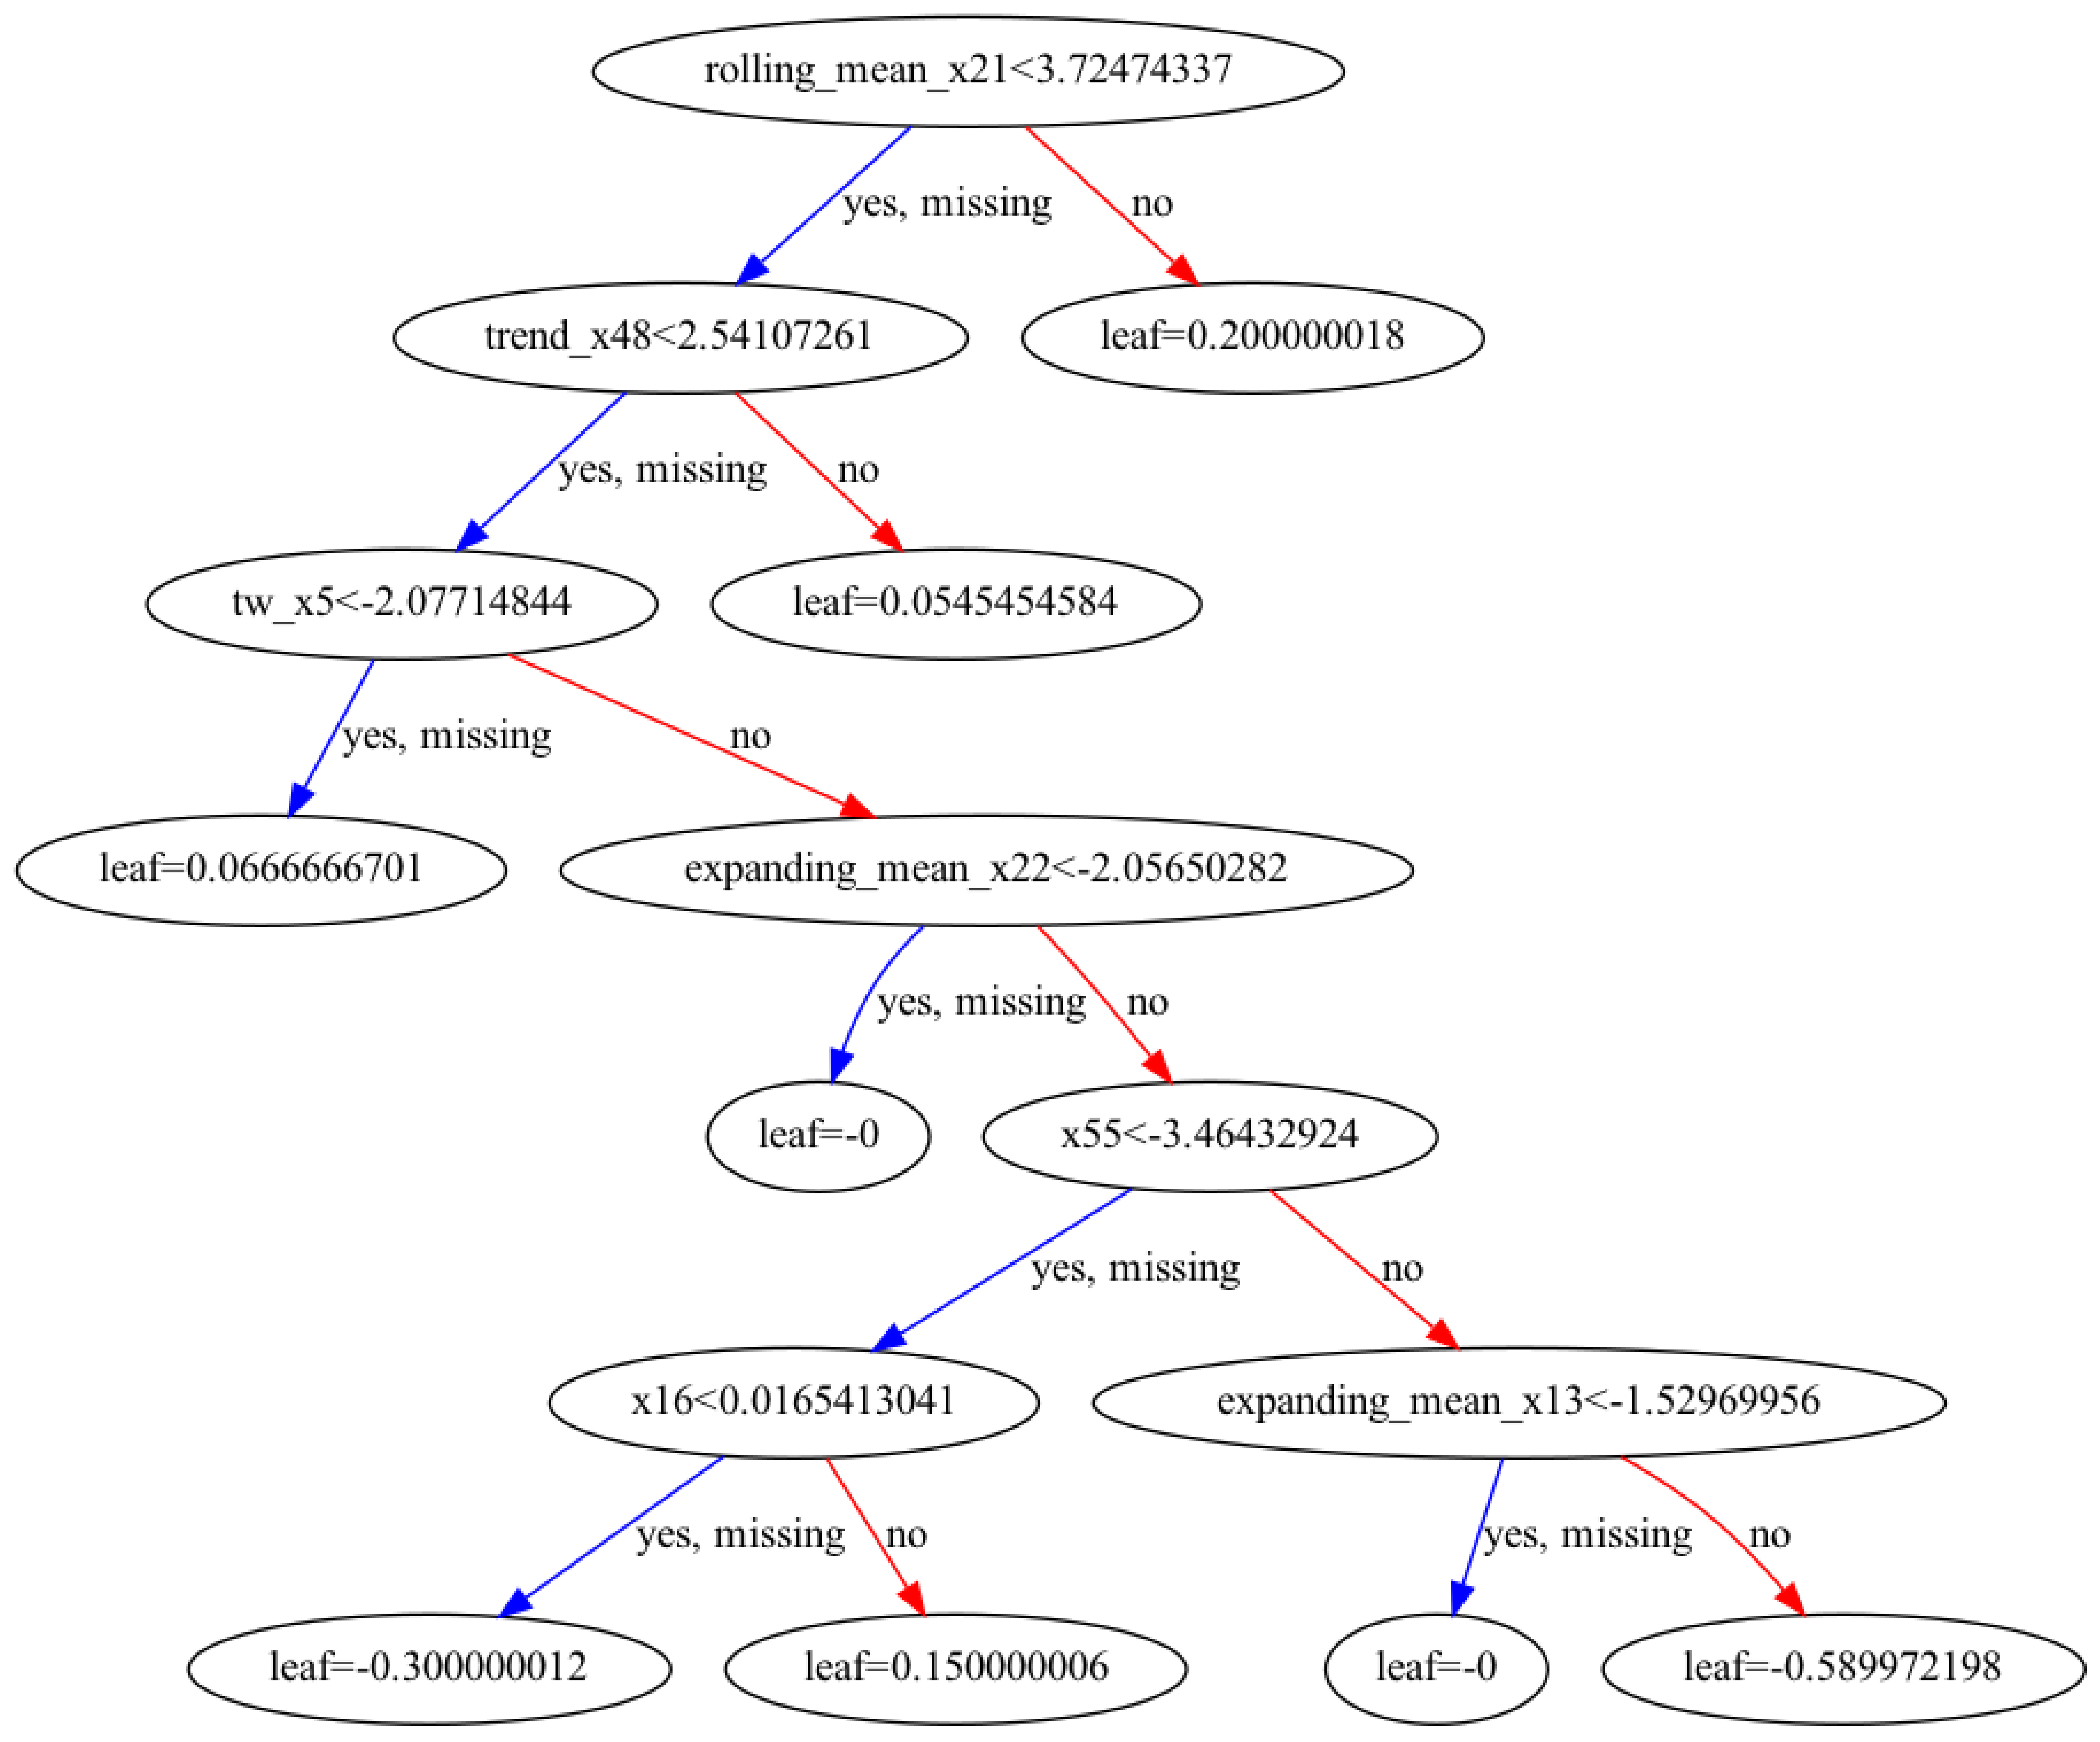

In [18]:
%matplotlib inline
from xgboost import plot_tree
from matplotlib.pylab import rcParams

##set up the parameters
rcParams['figure.figsize'] = 80,50

plot_tree(model)
#yes, missing here means this tree has handled missing values

# Weighted XGBoost for Class Imbalance


In [19]:
# define model
#scale_pos_weight=total_negative_examples / total_positive_examples
#total number of examples in the majority class / total number of examples in the minority class.
#18274/124=147.37
model = XGBClassifier(scale_pos_weight=147)

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))

Mean ROC AUC: 0.95297


In [20]:
clf_1 = model.fit(X_train, y_train)
pred_y_1 = clf_1.predict(X_test)

print(accuracy_score(pred_y_1, y_test))

0.9853747714808044


In [21]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred_y_1, target_names=target_names))

# View confusion matrix for test data and predictions
confusion_matrix(y_test, pred_y_1)

              precision    recall  f1-score   support

     class 0       0.99      1.00      0.99       540
     class 1       0.33      0.14      0.20         7

    accuracy                           0.99       547
   macro avg       0.66      0.57      0.60       547
weighted avg       0.98      0.99      0.98       547



array([[538,   2],
       [  6,   1]])

<AxesSubplot:>

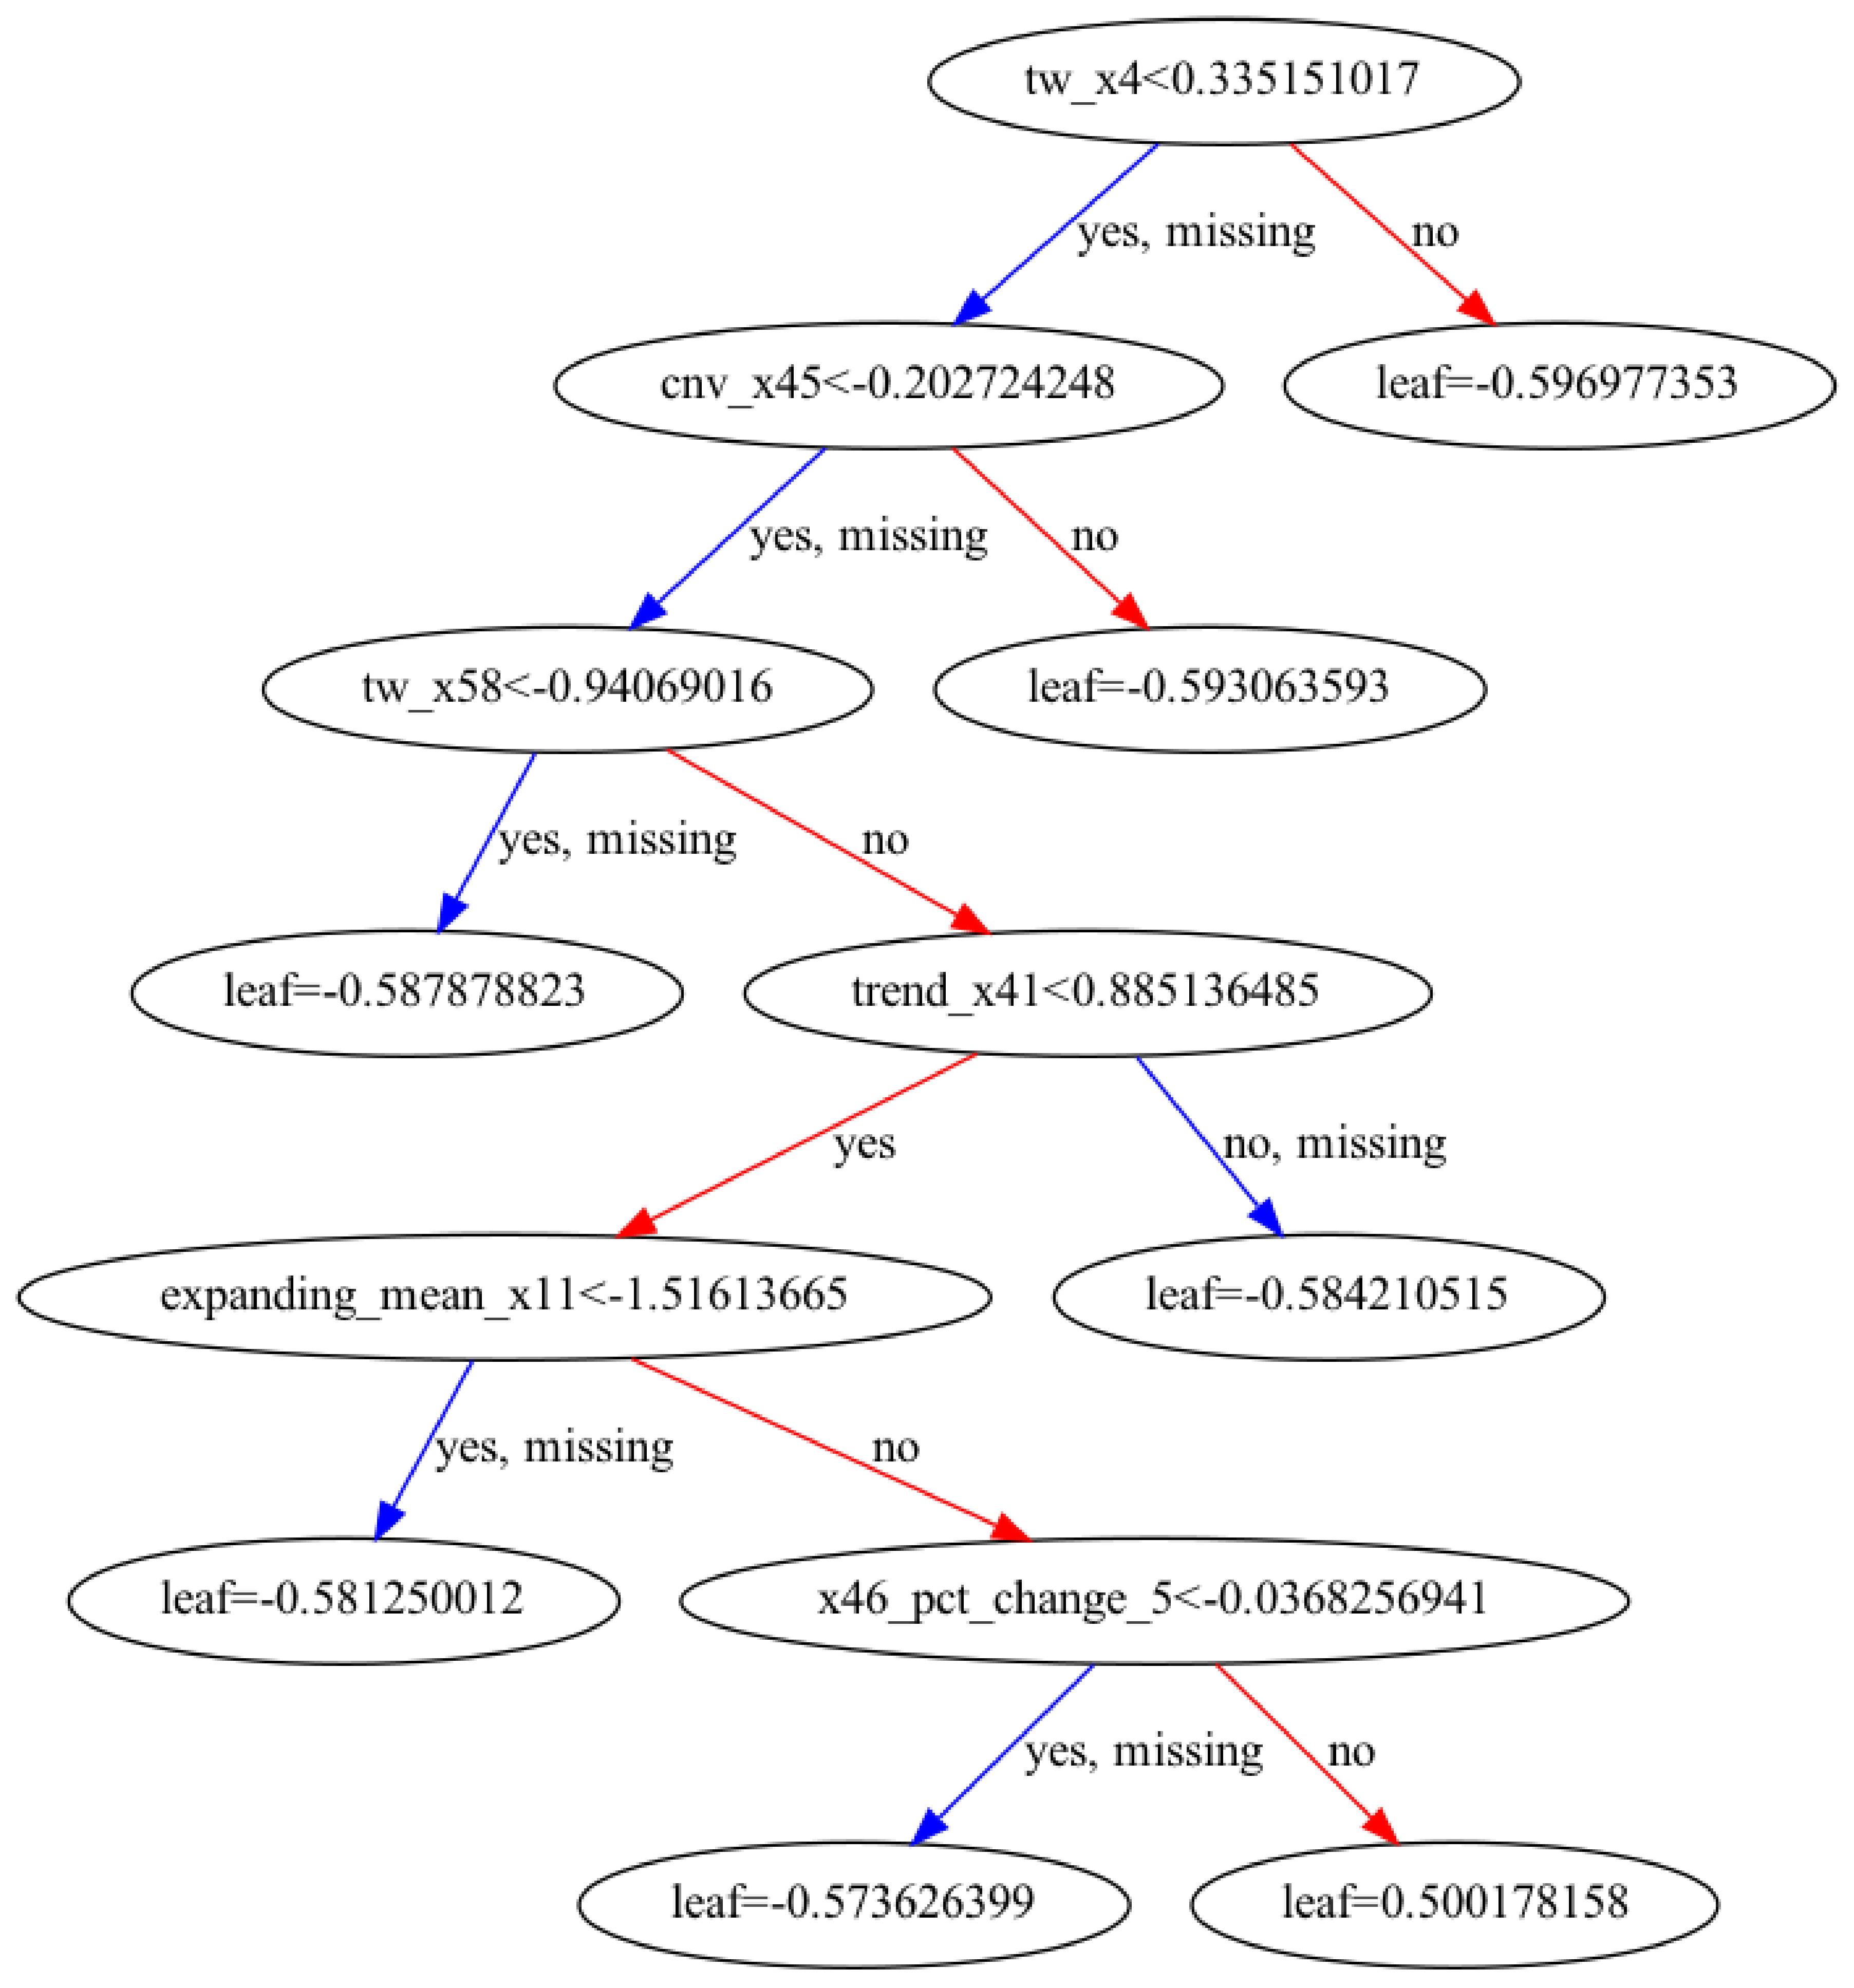

In [22]:
%matplotlib inline
from xgboost import plot_tree
from matplotlib.pylab import rcParams

##set up the parameters
rcParams['figure.figsize'] = 80,50

plot_tree(model)
#yes, missing here means this tree has handled missing values

# Tune with GridSearch CV

In [23]:
# define grid
weights = [1, 10, 25, 50, 75, 99, 100, 1000]
param_grid = dict(scale_pos_weight=weights)

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')

In [33]:
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/Users/chathurangishyalika/opt/anaconda3/envs/tf/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:03:30] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: 0.931436 using {'scale_pos_weight': 1}
0.931436 (0.040774) with: {'scale_pos_weight': 1}
0.927670 (0.048305) with: {'scale_pos_weight': 10}
0.929479 (0.045071) with: {'scale_pos_weight': 25}
0.922069 (0.046362) with: {'scale_pos_weight': 50}
0.923126 (0.051366) with: {'scale_pos_weight': 75}
0.922714 (0.053929) with: {'scale_pos_weight': 99}
0.922413 (0.053952) with: {'scale_pos_weight': 100}
0.905774 (0.058887) with: {'scale_pos_weight': 1000}


In [41]:
# define model
model = XGBClassifier(scale_pos_weight=2500)

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))

Mean ROC AUC: 0.93616


In [42]:
clf_2 = model.fit(X_train, y_train)
pred_y_2 = clf_2.predict(X_test)

print(accuracy_score(pred_y_2, y_test))



0.9890310786106032


In [43]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred_y_2, target_names=target_names))

# View confusion matrix for test data and predictions
confusion_matrix(y_test, pred_y_2)

              precision    recall  f1-score   support

     class 0       0.99      0.99      0.99       540
     class 1       0.57      0.57      0.57         7

    accuracy                           0.99       547
   macro avg       0.78      0.78      0.78       547
weighted avg       0.99      0.99      0.99       547



array([[537,   3],
       [  3,   4]])

<AxesSubplot:>

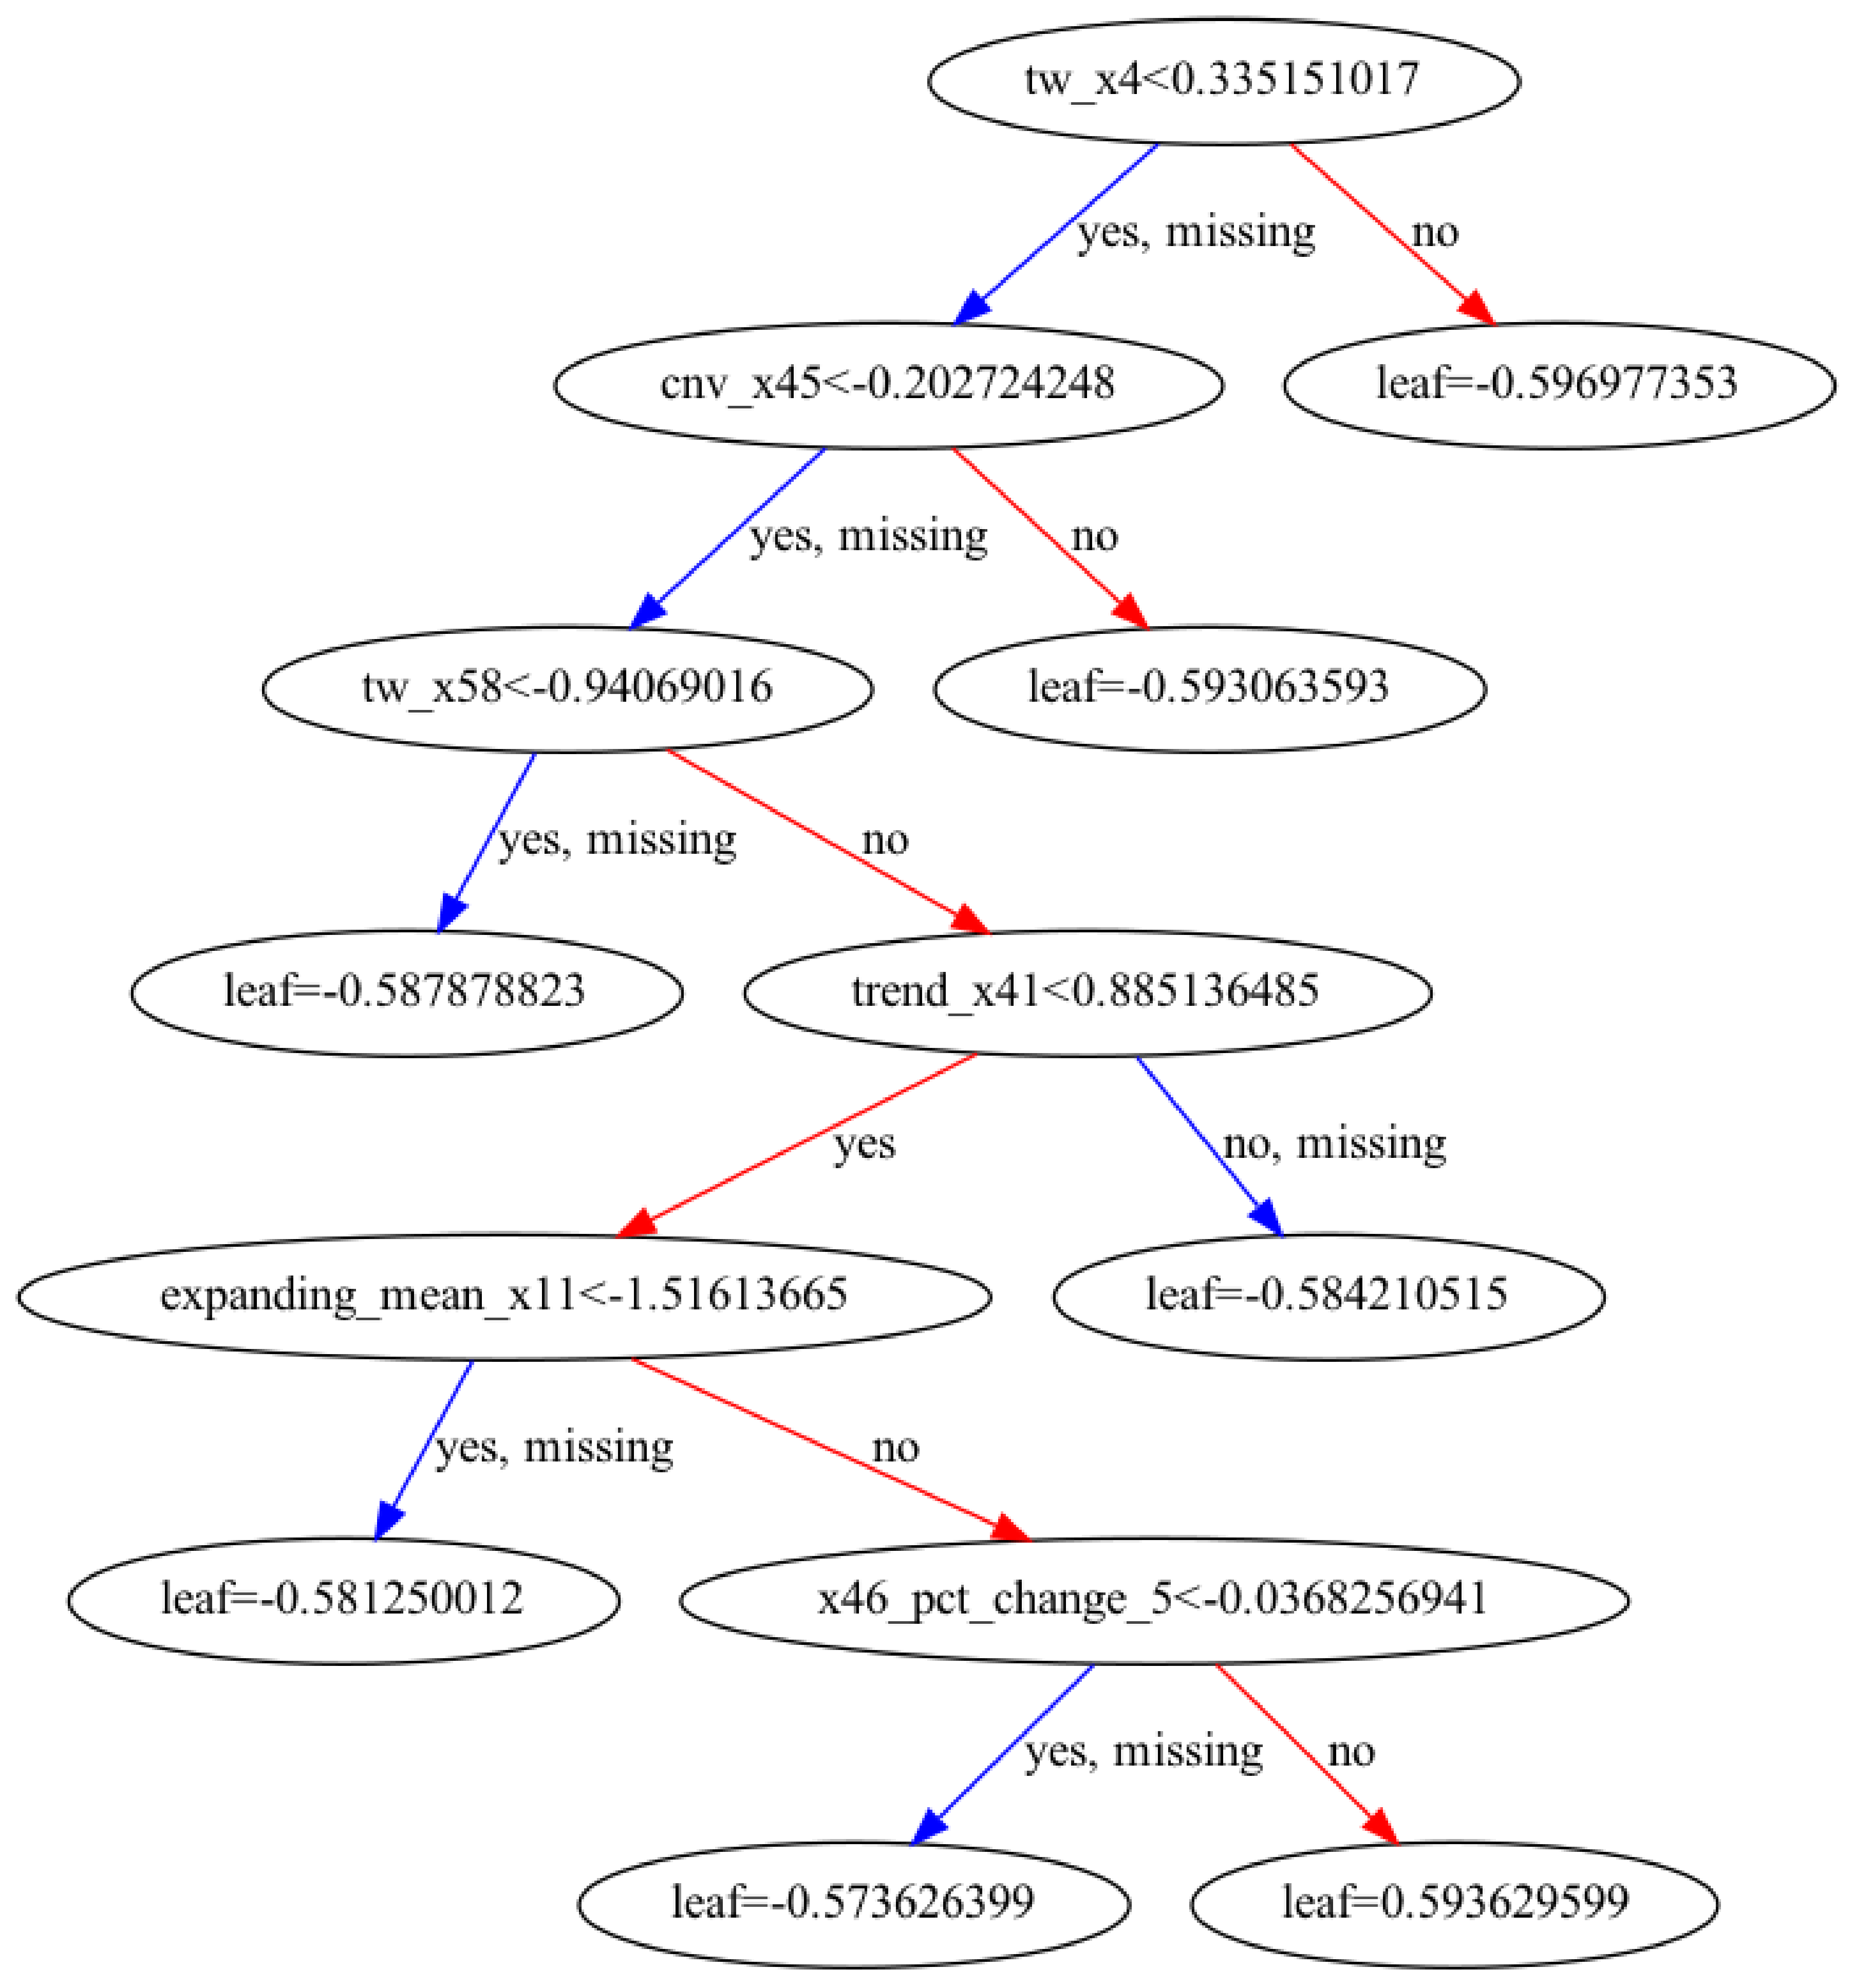

In [44]:
%matplotlib inline
from xgboost import plot_tree
from matplotlib.pylab import rcParams

##set up the parameters
rcParams['figure.figsize'] = 80,50

plot_tree(model)
#yes, missing here means this tree has handled missing values